In [5]:
import pandas as pd
import glob
import re
import math
import urllib.request
from bs4 import BeautifulSoup
from operator import itemgetter
import csv
import os
import networkx as nx
from networkx.algorithms import bipartite

In [6]:
def native_vote_csv_df():

    list_ = []

#     filepath = "/projects/canis/news_deserts/twitter/data/2018_10_0[6-9]*clean*"
    filepath = "/Users/tdt62/Desktop/test_data/2018_*vote*"

    # Takes all of the csv file and makes one big dataframe
    for name in glob.glob(filepath):
        if(os.stat(name).st_size == 0) == True:
            continue
        else:
            df = pd.read_csv(name,index_col=None, header=0)
            list_.append(df)

#     filepath = "/projects/canis/news_deserts/twitter/data/2018_10_[1-3]*clean*"

#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         df = pd.read_csv(name,index_col=None, header=0, delimiter='\t')
#         list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2018_11*stream_1*"
#     # filepath = "/Users/tdt62/Desktop/GraduateResearch/test_data/2018_11_*vote*"

#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2018_12*stream_1*"
#     # filepath = "/Users/tdt62/Desktop/test_data/2018_12_01*vote*"


#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2019_01*stream_1*"
#     # filepath = "/Users/tdt62/Desktop/test_data/2018_12_01*vote*"


#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

#     filepath = "/projects/canis/nativevote18/twitter/data/2019_02_0[0-6]*stream_1*"
#     # filepath = "/Users/tdt62/Desktop/test_data/2018_12_01*vote*"


#     # Takes all of the csv file and makes one big dataframe
#     for name in glob.glob(filepath):
#         if(os.stat(name).st_size == 0) == True:
#             continue
#         else:
#             df = pd.read_csv(name,index_col=None, header=0)
#             list_.append(df)

    # Makes the big df in memory
    frame = pd.concat(list_, axis = 0, ignore_index = True)
    frame.fillna("NA", inplace=True)
    return frame

def total_tweets(df):

    # Gets the total number of tweets
    total_tweets_num = df.shape[0]  # gives number of row count
    return total_tweets_num

def unique_tweets(df):

    # Gets the unique tweets i.e. no retweeted status
    df['rt_isdigit'] = list(map(lambda x: str(x).isdigit(), df['Retweeted_Status']))
    unique_df = df.loc[df['rt_isdigit'] == False]
    unique_tweet_num = unique_df.shape[0]
    return unique_tweet_num

def unique_domains(df):
    # Checks if URLs is empty or not
    def empty_list_check(x):
        if(x != '[]'):
            return True
        else:
            return False

    def get_domains(full_domain):
        domain_list = []
        if(isinstance(full_domain, str)):
            m = full_domain.split("//")[-1].split("/")[0].split('?')[0].split(',')[0]
            return m

        else:
            return element


    # Gets the tweets that have URLs in them i.e. URLs column is not '[]'
    df['domains'] = list(map(lambda x: empty_list_check(x), df['URLs']))

    # Gets the domains to be only the domains i.e. www.xyz.com
    df['actual_domain'] = list(map(lambda x: get_domains(x), df['URLs']))

    # Creates a df that only has domains in the tweet
    unique_df = df.loc[df['domains'] == True]

    # Get the number of domains
    unique_domains = len(unique_df.actual_domain.unique())

    domains_df = unique_df

    return unique_domains, domains_df

def unique_users(df):
    unique_users = len(df.User_ID.unique())
    return unique_users

def original_content_user(df):

    # Gets the unique tweets i.e. no retweeted status
    df['rt_isdigit'] = list(map(lambda x: str(x).isdigit(), df['Retweeted_Status']))
    unique_df = df.loc[df['rt_isdigit'] == False]
    unique_users = len(unique_df.User_ID.unique())
    return unique_users

def top_news_domains():

    #specify the url
    news_source = "https://www.alexa.com/topsites/category/Top/News"

    #Query the website and return the html to the variable 'page'
    page = urllib.request.urlopen(news_source)

    #Parse the html in the 'page' variable, and find all of the website domains
    soup = BeautifulSoup(page, features="html.parser")
    links = soup.find_all("a")
    link_list = []
    actual_news_list = []
    links_dict = {}
    for link in links:
        link_list.append(link.get("href"))
    i = 0
    for link in link_list:
        if link:
            if "siteinfo/" in link:
                news_link = link.split("/siteinfo/")[1]
                links_dict[news_link] = 0
                actual_news_list.append(news_link)

    return actual_news_list, links_dict

def get_top_news_domains(df, news_list, news_dict, top_val):

    # Function to iterate over the dataframe
    def iterate_domains_dict(x):
        for element in x.split():
            if element in news_list:
                news_dict[x] += 1
        return 0


    top_list = []

    # Iterates over the domain column
    list(map(lambda x: iterate_domains_dict(x), df['actual_domain']))

    # Gets the sorted news_list in descending order
    sorted_news_list = (list(sorted(news_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_news_list = sorted_news_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_news_list:
        top_list.append(item[0])

    return top_list, sorted_news_list

def hashtags(df, top_val):

    top_list = []
    hashtag_dict = {}

    def iterate_hashtags(x):
        hashtag_list = list(x.split("'text':"))
        for element in hashtag_list:
            stripped_element = element.split(',')[0].strip("' '{}[]")
            if stripped_element in hashtag_dict and stripped_element != '[]' and stripped_element != 'NA' and stripped_element != '':
                hashtag_dict[stripped_element] += 1
            else:
                hashtag_dict[stripped_element] = 1

    # Create the hashtag dict
    list(map(lambda x: iterate_hashtags(x), df['Hashtags']))

    # Gets the sorted news_list in descending order
    sorted_news_list = (list(sorted(hashtag_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_news_list = sorted_news_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_news_list:
        top_list.append(item[0])

    return top_list, sorted_news_list

def get_top_domains(df, top_val):
    top_list = []
    domain_dict = {}

    def iterate_domains(x):
        domain_list = list(x.split())
        for element in domain_list:
            if element in domain_dict and element != "NA":
                domain_dict[element] += 1
            else:
                domain_dict[element] = 1

    # Create the hashtag dict
    list(map(lambda x: iterate_domains(x), df['actual_domain']))

    # Gets the sorted news_list in descending order
    sorted_domain_list = (list(sorted(domain_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_domain_list = sorted_domain_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_domain_list:
        top_list.append(item[0])

    return top_list, sorted_domain_list

def get_number_of_domains(df):
    total_number_domains = len(df.actual_domain)
    return total_number_domains

def count_total_news(news_dict):
    total = sum(list(news_dict.values()))
    return total

def make_domain_csv(top_news_dict):
    with open('news_domains.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in top_news_dict.items():
            writer.writerow([key, value])

def make_hashtag_csv(hashtag_dict):
    with open('top_hashtags.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in top_news_dict.items():
            writer.writerow([key, value])

def make_domain_csv(domain_dict):
    with open('top_domains.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in top_news_dict.items():
            writer.writerow([key, value])

def top_user_mentions(df, top_val):

    top_users_list = []
    hashtag_dict = {}

    def iterate_user_mentions(x):

        hashtag_list = list(x.split("'screen_name':"))
        for element in hashtag_list:
            stripped_element = element.split(',')[0].strip("' '{}[]")
            if stripped_element in hashtag_dict and stripped_element != '[]' and stripped_element != 'NA' and stripped_element != '':
                hashtag_dict[stripped_element] += 1
            else:
                hashtag_dict[stripped_element] = 1

    # Create the hashtag dict
    list(map(lambda x: iterate_user_mentions(x), df['User_Mentions']))

    # Gets the sorted news_list in descending order
    sorted_news_list = (list(sorted(hashtag_dict.items(), key=itemgetter(1), reverse=True)))

    # Gets the top 20 results of the sorted list
    sorted_news_list = sorted_news_list[0:top_val]

    # Stores all the names in a list, so we can read correctky
    for item in sorted_news_list:
        top_users_list.append(item[0])

    return top_users_list, sorted_news_list

In [7]:
native_df = native_vote_csv_df()
native_df

,TweetID,Timestamp,Full_Text,In_Reply_To_User_ID,User_ID,User_Name,User_Screen_Name,Coordinates,Place,Bounding_Box,Quoted_Status_ID,Retweeted_Status,Hashtags,URLs,User_Mentions,Media,Language
0,1052544860421525504,2018-10-17 13:00:24,b'Want to understand the Green Party? Sara Mae...,NA,14345531,Liane Hernandez,loquesera,NA,NA,[],0,[],[],"[{'url': 'https://t.co/LSXEF5e6oR', 'expanded_...",[],[],en
1,1052544901513007105,2018-10-17 13:00:34,b'Follow Indigenous people. Listen. @rebeccana...,NA,920171445484896256,Evil ginger bitch,iamapartsguy,NA,NA,[],0,1052539455712751616,[],[],"[{'screen_name': 'KaitlinCurtice', 'name': 'Ka...",[],en
2,1052544911742889984,2018-10-17 13:00:36,b'See our AARP poll of adults over 50+ in WA C...,NA,617089370,Doug Shadel,dougshadel,NA,NA,[],0,1052254768096104448,[],[],"[{'screen_name': 'AARPWA', 'name': 'AARP Washi...",[],en
3,1052544988914049024,2018-10-17 13:00:55,b'@senatemajldr @GOP @TomColeOK04 @JimInhofe y...,1.24998e+09,978787610,Adrienne #VoteBlue Young #Resist,gentlemindmom,NA,NA,[],1052249777864409088,[],[],"[{'url': 'https://t.co/jBEWvUx9tD', 'expanded_...","[{'screen_name': 'senatemajldr', 'name': 'Lead...",[],en
4,1052545025534496768,2018-10-17 13:01:04,b'@KaitlinCurtice @rebeccanagle @xodanix3 @jus...,2.23787e+09,15718981,Jordan Humm,__jordanhumm,NA,NA,[],0,[],[],"[{'url': 'https://t.co/A5pv6Kiflo', 'expanded_...","[{'screen_name': 'KaitlinCurtice', 'name': 'Ka...",[],en
5,1052545034506125312,2018-10-17 13:01:06,"b'@ShariceDavids is a 2016 White House fellow,...",NA,917515800,Marcie,_strate,NA,NA,[],0,1052463048743690240,[],[],"[{'screen_name': 'RavenResists', 'name': '👻🎃🦇🕸...",[],en
6,1052545036058013696,2018-10-17 13:01:06,b'This story is why I am voting for @shariceda...,NA,874065317173096453,Maddie Barry,MaddieBarry8,NA,NA,[],0,1052519024217784320,[],[],"[{'screen_name': 'gayleasher1', 'name': 'Gayle...",[],en
7,1052545069532626944,2018-10-17 13:01:14,b'',NA,816793158293987328,Jderb,jjderb41,NA,NA,[],0,1052024528103063552,"[{'text': 'walkaway', 'indices': [45, 54]}, {'...",[],"[{'screen_name': 'ledermanu', 'name': 'Uri Led...",[],en
8,1052545083315228672,2018-10-17 13:01:17,b'@POTUS @realDonaldTrump @VP @RepTomEmmer @Re...,NA,4298028747,Patricia Hammes,PatriciaHammes2,NA,NA,[],1052542592599162880,1052543537273851904,[],[],"[{'screen_name': 'MinnesotaMiners', 'name': 'M...",[],und
9,1052545104542617600,2018-10-17 13:01:22,b'@ShariceDavids She is Cornell Law School gra...,NA,917515800,Marcie,_strate,NA,NA,[],0,1052460609319698432,[],[],"[{'screen_name': 'RavenResists', 'name': '👻🎃🦇🕸...",[],en


In [8]:
# Create big df for manipulating the data
native_df = native_vote_csv_df()

# Get the count of unique domains and the df associated
unique_domains_count, domains_df = unique_domains(native_df)

# Total number of tweets
count_row = total_tweets(native_df)

# Unique number of tweets
unique_tweets_count = unique_tweets(native_df)

# Unique users based on UserID
unique_users_count = unique_users(native_df)

# Original Content creater count
original_content = original_content_user(native_df)

# Generates the list and dict associated with the domains
top_news_list, top_news_dict = top_news_domains()

# Gets the top 10 news domains
top_news_list, sorted_top_news_list = get_top_news_domains(domains_df, top_news_list, top_news_dict, 10)

# Gets top 20 domains
top_domain_list, sorted_top_news_list = get_top_domains(domains_df, 20)

# Gets the total number of domains mentioned
total_domains = get_number_of_domains(domains_df)

# Count total number of news domains
total_news_domains = count_total_news(top_news_dict)

# Generate a CSV for the domain and it's occurence
make_domain_csv(top_news_dict)

# Gets the list for top 20 hashtags
top_hashtags, hashtag_sorted_list = hashtags(native_df, 20)

# Get the top 20 user mentions
top_users_list, sorted_news_list = top_user_mentions(native_df, 20)

# Prints each value
print("Total Number of Tweets: {}".format(count_row))
print("Unique Tweets: {}".format(unique_tweets_count))
print("Unique Domains: {}".format(unique_domains_count))
print("Unique Users: {}".format(unique_users_count))
print("Original Content Users: {}".format(original_content))
print("Total Number of Domains: {}".format(total_domains))
print("Total Number of News Domains: {}\n".format(total_news_domains))
print("Top 10 News Domains: {}\n".format(top_news_list))
print("Top 20 Hashtags: {}\n".format(top_hashtags))
print("Top 20 Domains: {}\n".format(top_domain_list))
print("Top 20 User Mentions: {}\n".format(top_users_list))


Total Number of Tweets: 356
Unique Tweets: 112
Unique Domains: 19
Unique Users: 304
Original Content Users: 100
Total Number of Domains: 92
Total Number of News Domains: 0

Top 10 News Domains: ['reddit.com', 'google.com', 'cnn.com', 'nytimes.com', 'theguardian.com', 'weather.com', 'indiatimes.com', 'yahoo.com', 'shutterstock.com', 'foxnews.com']

Top 20 Hashtags: ['Alaska', 'ID01', 'IndyCar', 'WalkAwayFromDemocrats2018', 'HelpSaveALife', 'VoteRed', 'HawaiiMidTerms', '', 'walkaway', 'oklaed', 'MN02', 'KS03', 'HawaiiVoters', 'Hawaii', 'RonCurtis', 'MazieHirono', 'AndriaTupola', 'MarissaKerns', 'np', 'SoundCloud']

Top 20 Domains: ['twitter.com', 'www.latimes.com', 'bit.ly', 'gofundme.com', 'www.newson6.com', 'truthandgrace.com', 'www.cbsnews.com', 'lsufootballreport.com', 'soundcloud.com', 'mobile.twitter.com', 'www.godspeaksinternetradio.com', 'www.facebook.com', 'prezi.com', 'fxn.ws', "www.ksvotes.org'", 'dlvr.it', 'go.shr.lc', 'www.naointendo.com.br', 'www.adn.com']

Top 20 User Ment

In [9]:
native_df = native_vote_csv_df()

unique_df = unique_tweets(native_df)

hashtag_user_df = get_hashtag_users_df(unique_df)

user_hashtag_dict = {}

def build_mentions_dict(df):
    
    def make_csv(user_hashtag_dict):
        with open('user_hashtag.csv', 'w') as csv_file:
            writer = csv.writer(csv_file)
            for key, value in user_hashtag_dict.items():
                writer.writerow([key, value])
            
    
    user_list = list(df['User_Mentions'].split("'screen_name':"))
    hashtag_list = list(df['Hashtags'].split("'text':"))
    print(user_list, '\n\n')
                        
    for user in user_list:
        stripped_user = user.split(',')[0].strip("' '{}[]")
        if stripped_user != '[]' and stripped_user != 'NA' and stripped_user != '':
            for hashtag in hashtag_list:
                stripped_hashtag = hashtag.split(',')[0].strip("' '{}[]")
                if stripped_hashtag != '[]' and stripped_hashtag != 'NA' and stripped_hashtag != '':
                    dict_tuple = (stripped_user, stripped_hashtag)
#                     print(dict_tuple)
                    if(dict_tuple in user_hashtag_dict):
                        user_hashtag_dict[dict_tuple] += 1
                    else:
                        user_hashtag_dict[dict_tuple] = 1
    make_csv(user_hashtag_dict)
    return user_hashtag_dict
                        


            
hashtag_user_df.apply(build_mentions_dict, axis=1)
# print(user_hashtag_dict)



NameError: name 'get_hashtag_users_df' is not defined

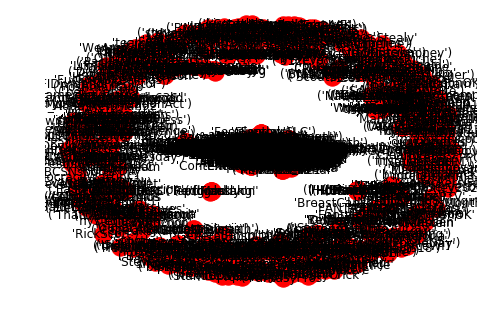

In [18]:
df = pd.read_csv("/Users/tdt62/Desktop/GraduateResearch/scripts/user_hashtag.csv", names=['User_Hashtag', 'Count'])
df

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
bi1_list = []
bi2_list = []
for val in df['User_Hashtag']:
    x = val.split(',')
    bi1_list.append(x[0])
    bi2_list.append(x[1])
    
B.add_nodes_from(bi1_list, bipartite=0)
B.add_nodes_from(bi2_list, bipartite=1)

# Add edges only between nodes of opposite node sets
B.add_edges_from(list(zip(bi1_list, bi2_list)))

G = bipartite.weighted_projected_graph(B, B.nodes())
nx.draw(G, with_labels = True)
# user_hashtag_dict = {}
# df.apply(build_mentions_dict, axis=1)

KeyboardInterrupt: 